In [3]:
from functions import *    

62 62
500 500


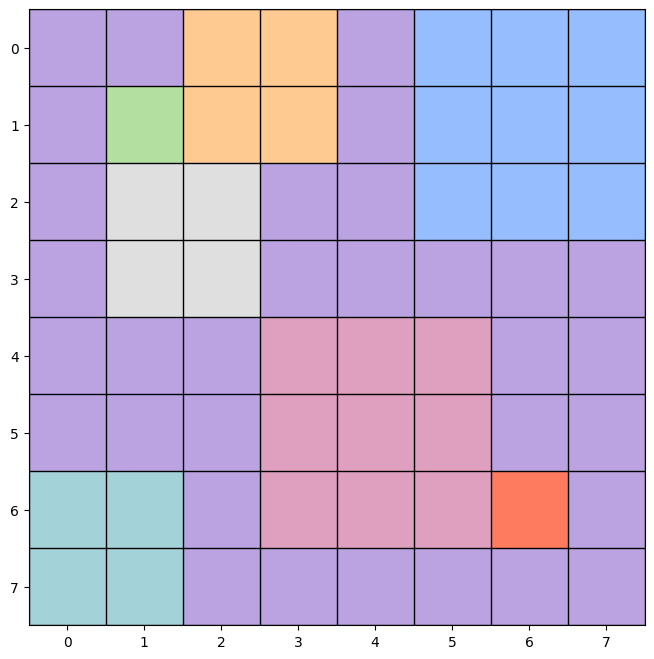

In [4]:
# Esegui il codice
image_path = "/Users/HP/Desktop/Python/queen_solver/77.png"
color_matrix = main(image_path)
plot_color_matrix(color_matrix)

In [5]:
def create_solver_dict(indexed_matrix):
    solver_dict = {}
    for i in range(indexed_matrix.shape[0]):
        for j in range(indexed_matrix.shape[1]):
            if indexed_matrix[i][j][1] == 0:
                if indexed_matrix[i][j][0] in solver_dict.keys():
                    solver_dict[indexed_matrix[i][j][0]].append((i, j))
                else:
                    solver_dict[indexed_matrix[i][j][0]] = [(i, j)]
    return solver_dict

In [6]:
def check_if_color_single_cell(solver_dict):
    to_assign = []
    for key, elem in solver_dict.items():
        if len(elem) == 1:
            to_assign.append(elem[0])
    return to_assign

In [7]:
def check_if_row_single_cell(solver_dict):
    to_assign = []
    row_dict = {}
    for key, elem in solver_dict.items():
        
        for cell in elem:
            if cell[0] in row_dict.keys():
                row_dict[cell[0]] += 1
            else:
                row_dict[cell[0]] = 1

    for row, count in row_dict.items():
        if count == 1:
            for cell in elem:
                if cell[0] == row:
                    to_assign.append(cell)
    return to_assign

In [8]:
def check_if_column_single_cell(solver_dict):
    to_assign = []
    column_dict = {}
    for key, elem in solver_dict.items():
        
        for cell in elem:
            if cell[1] in column_dict.keys():
                column_dict[cell[1]] += 1
            else:
                column_dict[cell[1]] = 1
                
    for column, count in column_dict.items():
        if count == 1:
            for cell in elem:
                if cell[1] == column:
                    to_assign.append(cell)
    return to_assign

In [9]:
def assign_queen(indexed_matrix, cell):
    grid_size = indexed_matrix.shape[0]
    # Assegna la regina alla cella
    indexed_matrix[cell[0]][cell[1]][1] = 1
    # Assegna -1 a tutte le celle della riga
    for i in range(grid_size):
        if indexed_matrix[i][cell[1]][1] == 0:
            indexed_matrix[i][cell[1]][1] = -1
    # Assegna -1 a tutte le celle della colonna
    for j in range(grid_size):
        if indexed_matrix[cell[0]][j][1] == 0:
            indexed_matrix[cell[0]][j][1] = -1
    # Assegna -1 a tutte le celle della diagonale
    for i in range(grid_size):
        # Check the four possible diagonal neighbors at distance 1
        for dr, dc in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
            nr, nc = cell[0] + dr, cell[1] + dc
            if 0 <= nr < grid_size and 0 <= nc < grid_size and indexed_matrix[nr, nc, 1] == 0:
                indexed_matrix[nr, nc][1] = -1
    # Assegna -1 a tutte le celle dello stesso colore
    color = indexed_matrix[cell[0]][cell[1]][0]
    for i in range(grid_size):
        for j in range(grid_size):
            if indexed_matrix[i][j][0] == color and indexed_matrix[i][j][1] == 0:
                indexed_matrix[i][j][1] = -1
    return indexed_matrix

In [10]:
def plot_indexed_matrix(indexed_matrix, color_dict):
    grid_size = indexed_matrix.shape[0]
    color_matrix = indexed_matrix[:, :, 0]  # Extract color indices
    
    # Create an RGB image
    rgb_image = np.zeros((grid_size, grid_size, 3), dtype=np.uint8)
    
    for row in range(grid_size):
        for col in range(grid_size):
            color_index = color_matrix[row, col]
            rgb_image[row, col] = color_dict.get(color_index, [255, 255, 255])  # Default to white if not in dict
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot the colored background
    ax.imshow(rgb_image)
    
    # Add symbols
    for row in range(grid_size):
        for col in range(grid_size):
            value = indexed_matrix[row, col, 1]
            if value == 1:  # Queen
                ax.text(col, row, '⚫', ha='center', va='center', fontsize=40, color='black')
            elif value == -1:  # Marked as X
                ax.text(col, row, 'X', ha='center', va='center', fontsize=30, color='black')

    # Set grid
    ax.set_xticks(np.arange(grid_size + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(grid_size + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.tick_params(which="minor", size=0)
    
    plt.show()


In [11]:
def solver(indexed_matrix, color_dict):
    grid_size = indexed_matrix.shape[0]
    solver_dict = create_solver_dict(indexed_matrix)
    to_assign = []
    while True:
        tmp = []
        to_assign.extend(check_if_color_single_cell(solver_dict))
        
        tmp.extend(check_if_row_single_cell(solver_dict))
        tmp.extend(check_if_column_single_cell(solver_dict))
        
        to_assign.extend(x for x in tmp if x not in to_assign)
        
        if len(to_assign) == 0:
            break
        
        for cell in to_assign:
            indexed_matrix = assign_queen(indexed_matrix, cell)
            plot_indexed_matrix(indexed_matrix, color_dict)
        to_assign = []
        
        solver_dict = create_solver_dict(indexed_matrix)
        
    return indexed_matrix

62 62
500 500


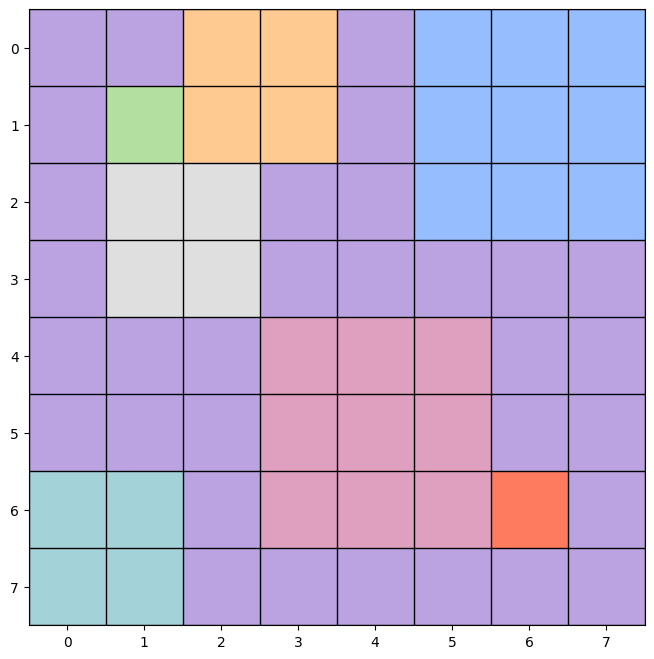

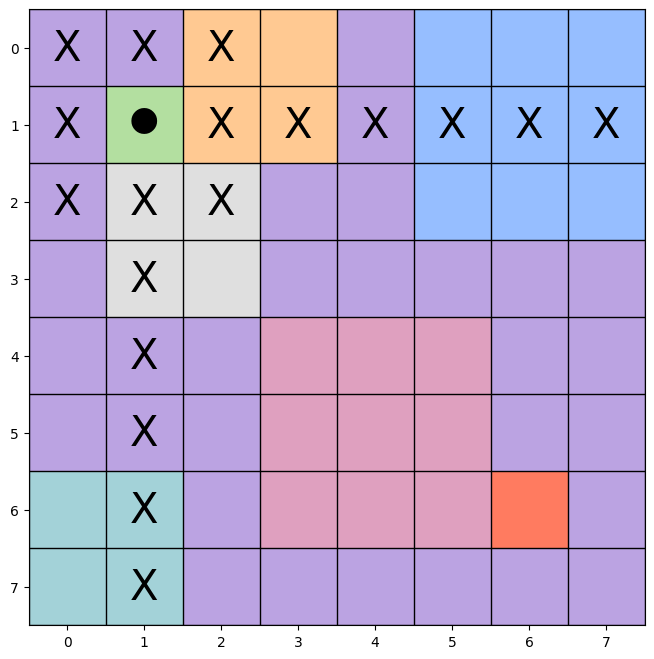

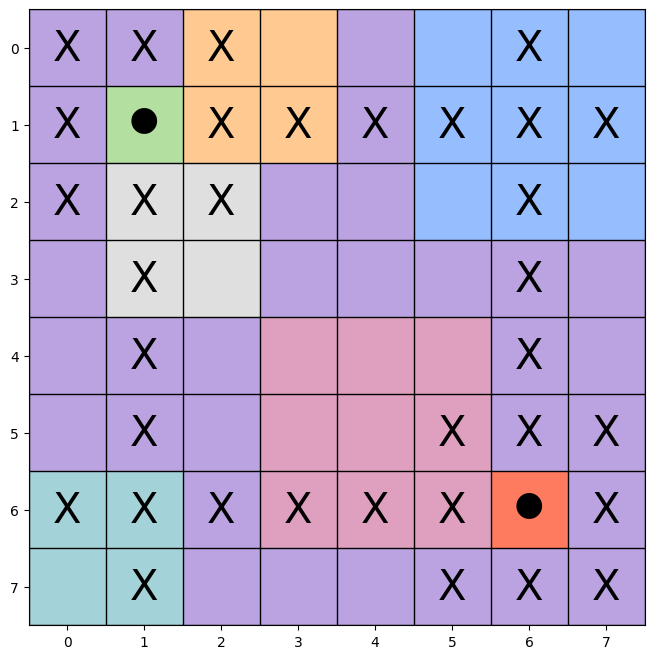

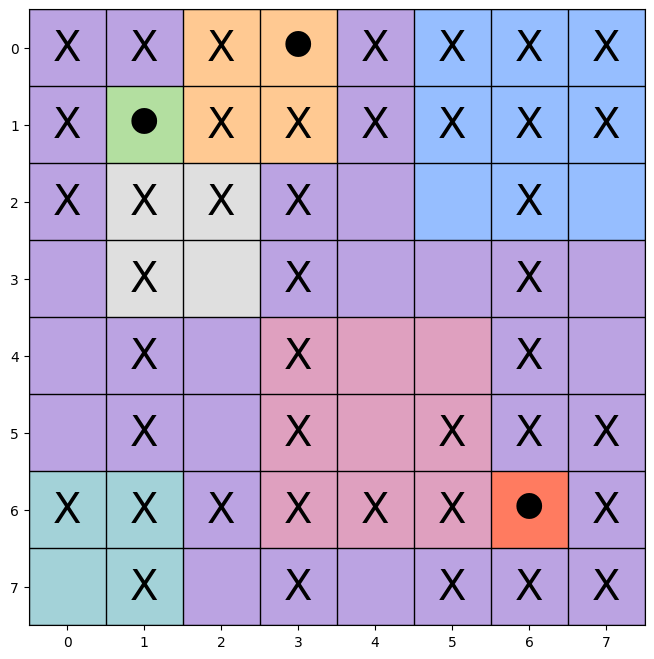

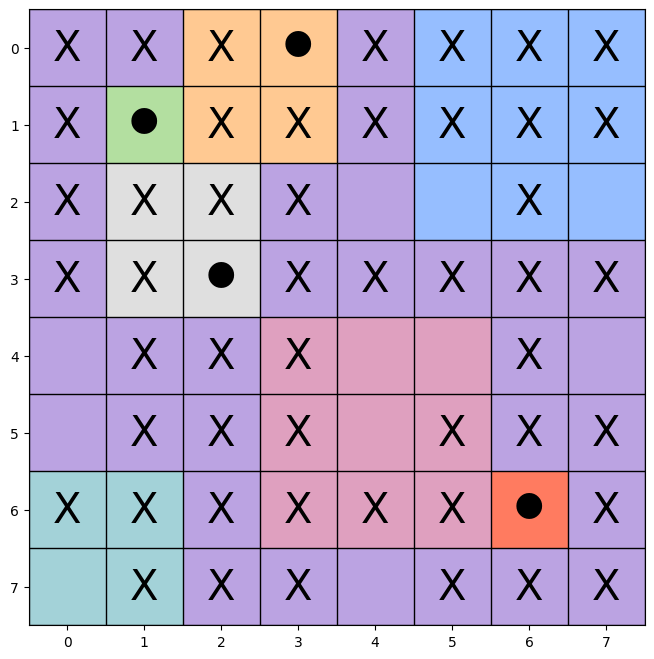

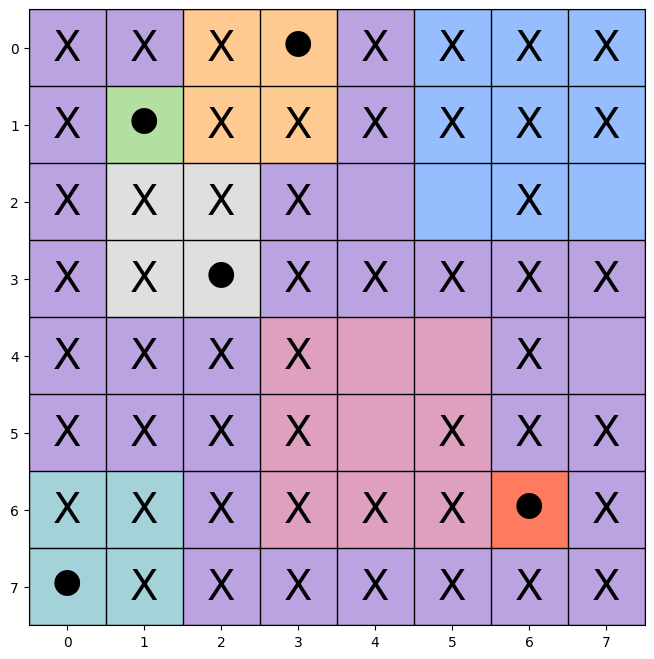

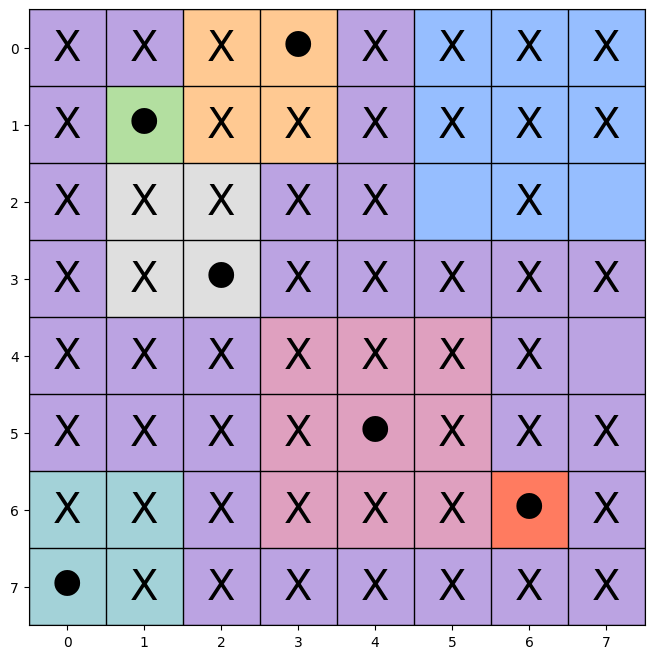

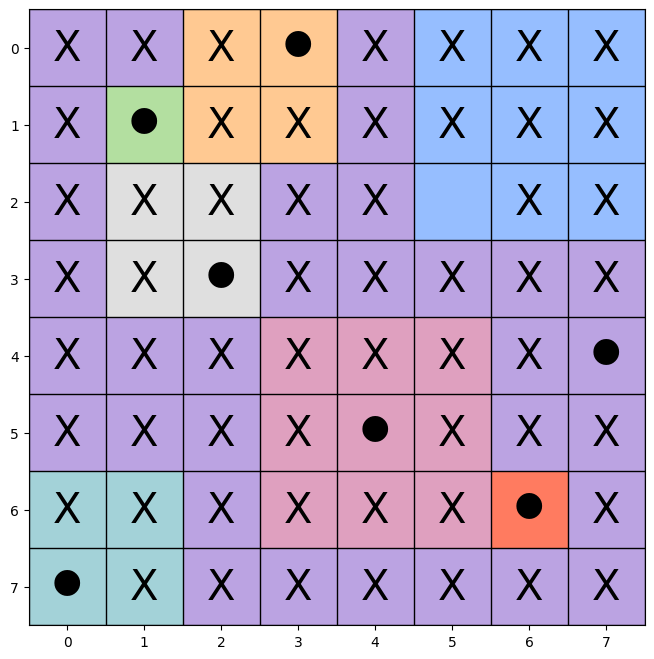

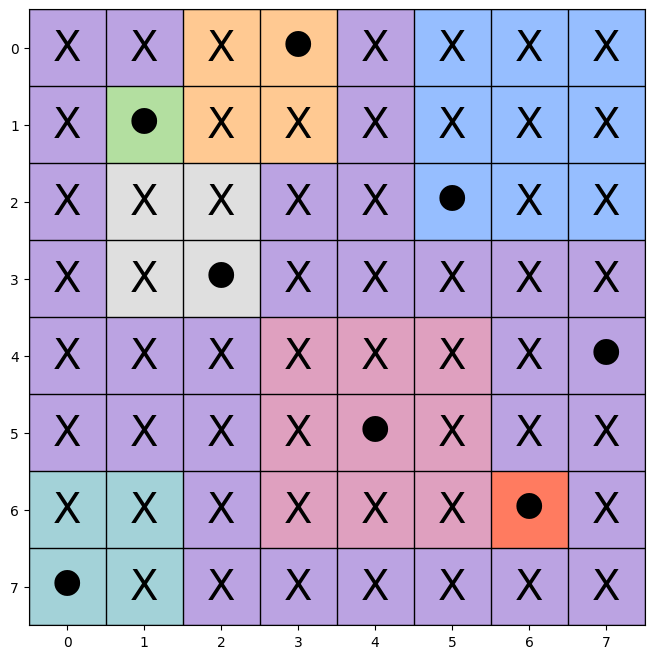

In [12]:
# Esegui il codice
image_path = "/Users/HP/Desktop/Python/queen_solver/77.png"
color_matrix = main(image_path)
plot_color_matrix(color_matrix)

indexed_matrix, color_dict = convert_color_matrix(color_matrix)
indexed_matrix = np.array([[[idx, 0] for idx in row] for row in indexed_matrix])
a = solver(indexed_matrix, color_dict)

In [13]:
def assign_empty(indexed_matrix, cell):
    
    if indexed_matrix[cell[0]][cell[1]][1] == 1:
        return "Cell already assigned" # Error to handle!
    
    indexed_matrix[cell[0]][cell[1]][1] = -1
    
    return indexed_matrix

In [14]:
def check_if_color_single_rc(solver_dict, grid_size):
    to_assign_empty = []
    for key, elem in solver_dict.items():
        rows = []
        columns = []
        for cell in elem:
            rows.append(cell[0])
            columns.append(cell[1])
        if len(set(rows)) == 1:
            to_assign_empty.extend(list(set([(rows[0], i) for i in range(grid_size)])-set(elem)))
        if len(set(columns)) == 1:
            to_assign_empty.extend(list(set([(i, columns[0]) for i in range(grid_size)])-set(elem)))
    return to_assign_empty

62 62
563 562


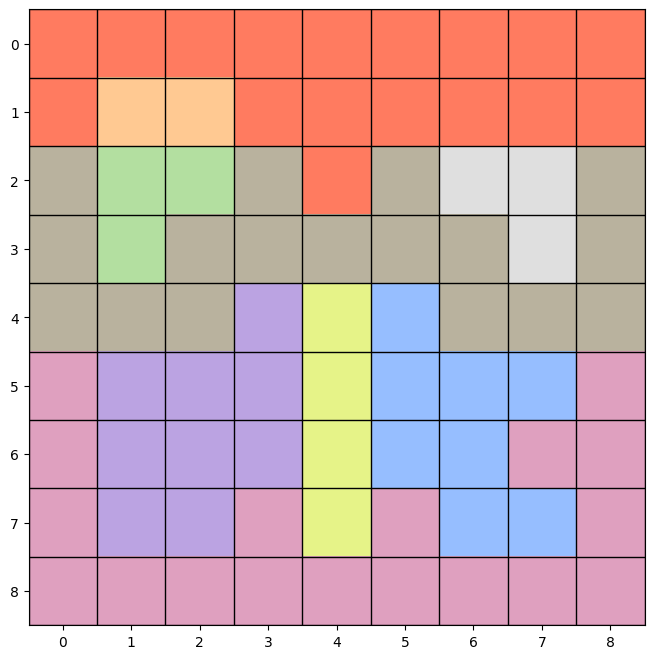

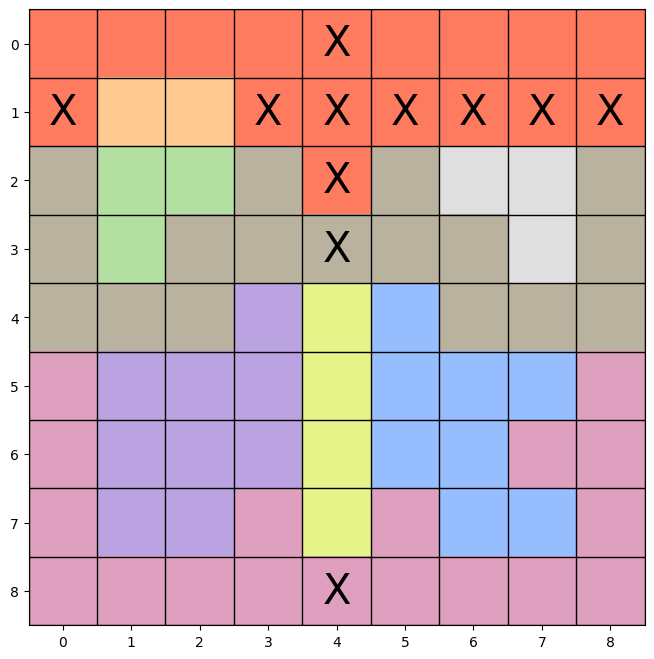

In [15]:
image_path = "/Users/HP/Desktop/Python/queen_solver/324.png"
color_matrix = main(image_path)
plot_color_matrix(color_matrix)

indexed_matrix, color_dict = convert_color_matrix(color_matrix)
indexed_matrix = np.array([[[idx, 0] for idx in row] for row in indexed_matrix])
solver_dict = create_solver_dict(indexed_matrix)
to_assign_empty = check_if_color_single_rc(solver_dict, indexed_matrix.shape[0])
for cell in to_assign_empty:
    indexed_matrix = assign_empty(indexed_matrix, cell)
plot_indexed_matrix(indexed_matrix, color_dict)
#a = solver(indexed_matrix, color_dict)

In [16]:
def check_if_rc_single_color(solver_dict, grid_size):
    ''' Check if a row/column is populated by a single color and returns the cells of thata color to assign empty
    '''
    to_assign_empty = []
    rows_dict = {i: set() for i in range(grid_size)}
    columns_dict = {i: set() for i in range(grid_size)}

    for key, elem in solver_dict.items():
        for cell in elem:
            rows_dict[cell[0]].add(key)
            columns_dict[cell[1]].add(key)
    
    for row, colors in rows_dict.items():
        if len(colors) == 1:
            to_assign_empty.extend(x for x in solver_dict[list(colors)[0]] if x[0] != row)

    for column, colors in columns_dict.items():
        if len(colors) == 1:
            to_assign_empty.extend(x for x in solver_dict[list(colors)[0]] if x[1] != column)

    return to_assign_empty

62 62
563 562


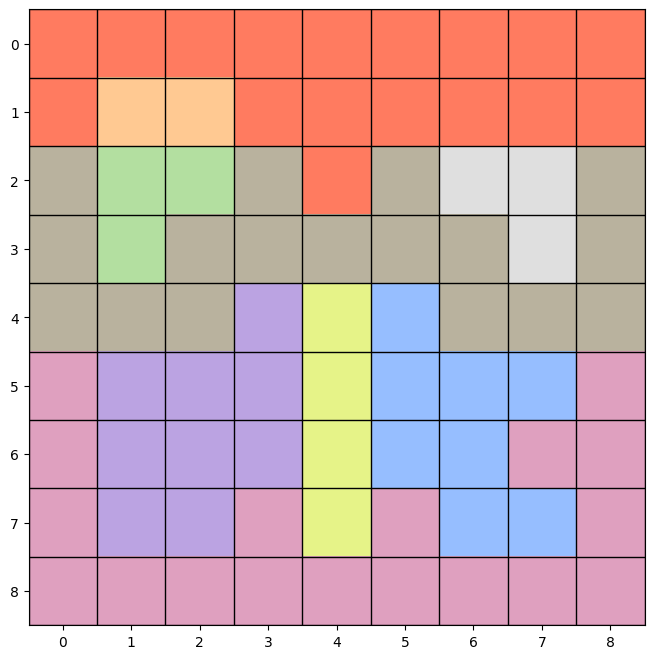

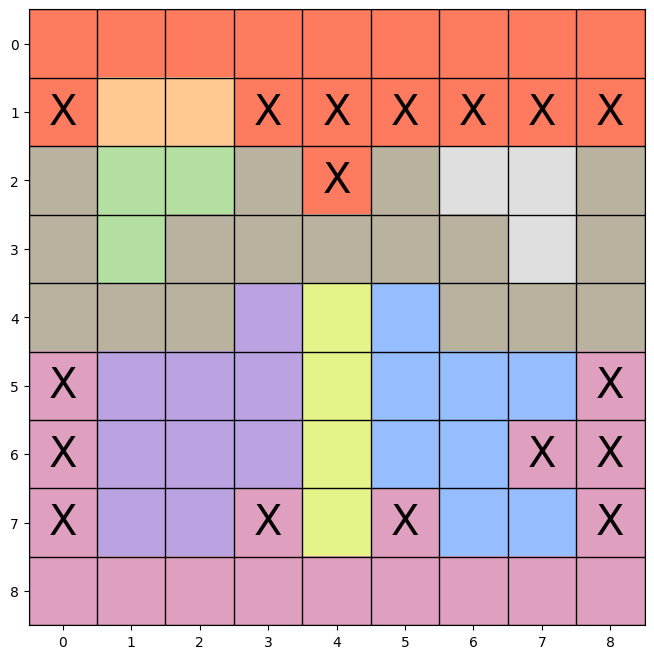

In [17]:
image_path = "/Users/HP/Desktop/Python/queen_solver/324.png"
color_matrix = main(image_path)
plot_color_matrix(color_matrix)

indexed_matrix, color_dict = convert_color_matrix(color_matrix)
indexed_matrix = np.array([[[idx, 0] for idx in row] for row in indexed_matrix])
solver_dict = create_solver_dict(indexed_matrix)
to_assign_empty = check_if_rc_single_color(solver_dict, indexed_matrix.shape[0])
for cell in to_assign_empty:
    indexed_matrix = assign_empty(indexed_matrix, cell)
plot_indexed_matrix(indexed_matrix, color_dict)
#a = solver(indexed_matrix, color_dict)

In [ ]:
def check_if_color_corr(solver_dict, grid_size):
    ''' Check if n rows/columns are populated by the same n colors and returns the cells of other colors in that rows/columns to assign empty
    '''
    to_assign_empty = []
    # rows_dict = {i: set() for i in range(grid_size)}
    # columns_dict = {i: set() for i in range(grid_size)}
    colors_rows_dict = {i: set() for i in range(grid_size)}
    colors_columns_dict = {i: set() for i in range(grid_size)}

    for key, elem in solver_dict.items():
        for cell in elem:
            colors_rows_dict[key].add(cell[0])
            colors_columns_dict[key].add(cell[1])

    rows_colors_dict = {}
    columns_colors_dict = {}

    for color, rows in colors_rows_dict.items():
        if tuple(set(rows)) in rows_colors_dict.keys():
            rows_colors_dict[tuple(set(rows))].append(color)
        else:
            rows_colors_dict[tuple(set(rows))] = [color]

    rows_keys = list(rows_colors_dict.keys())
    rows_keys = sorted(rows_keys, key=len)

    for i in range(len(rows_keys)):
        for j in range(i+1, len(rows_keys)):
            if set(rows_keys[i]) - set(rows_keys[j]) == set():
                rows_colors_dict[rows_keys[j]].extend(rows_colors_dict[rows_keys[i]])
                rows_colors_dict[rows_keys[j]] = list(set(rows_colors_dict[rows_keys[j]]))

    #print(rows_colors_dict)

    for rows, colors in rows_colors_dict.items():
        if len(rows) == len(colors) and len(rows) > 1:

            to_assign_empty.extend(list(set((row, i) for row in rows for i in range(grid_size)) - set(cell for color in colors for cell in solver_dict[color])))

    for color, columns in colors_columns_dict.items():
        if tuple(set(columns)) in columns_colors_dict.keys():
            columns_colors_dict[tuple(set(columns))].append(color)
        else:
            columns_colors_dict[tuple(set(columns))] = [color]


    columns_keys = list(columns_colors_dict.keys())
    columns_keys = sorted(columns_keys, key=len)

    for i in range(len(columns_keys)):
        for j in range(i+1, len(columns_keys)):
            if set(columns_keys[i]) - set(columns_keys[j]) == set():
                columns_colors_dict[columns_keys[j]].extend(columns_colors_dict[columns_keys[i]])
                columns_colors_dict[columns_keys[j]] = list(set(columns_colors_dict[columns_keys[j]]))

    print(columns_colors_dict)
    
    for columns, colors in columns_colors_dict.items():
        if len(columns) == len(colors) and len(columns) > 1:
            to_assign_empty.extend(list(set((i, column) for column in columns for i in range(grid_size)) - set(cell for color in colors for cell in solver_dict[color])))

    return to_assign_empty
    

62 62
563 562


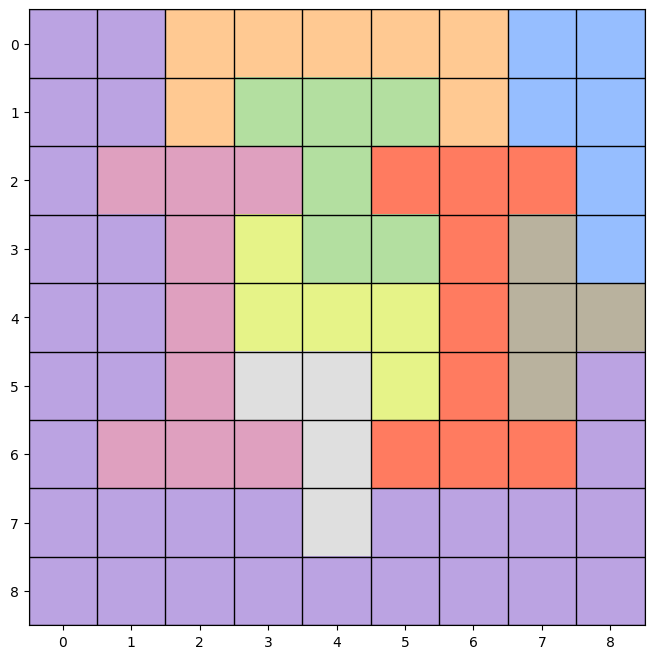

{(8, 7): [0, 2], (3, 4, 5): [1, 6], (0, 1, 2, 3, 4, 5, 6, 7, 8): [3], (1, 2, 3): [4], (3, 4): [5], (5, 6, 7): [7], (2, 3, 4, 5, 6): [8]}
[(8, 7), (3, 4), (3, 4, 5), (1, 2, 3), (5, 6, 7), (2, 3, 4, 5, 6), (0, 1, 2, 3, 4, 5, 6, 7, 8)]
{(8, 7): [0, 2], (3, 4, 5): [1, 5, 6], (0, 1, 2, 3, 4, 5, 6, 7, 8): [0, 1, 2, 3, 4, 5, 6, 7, 8], (1, 2, 3): [4], (3, 4): [5], (5, 6, 7): [7], (2, 3, 4, 5, 6): [8, 1, 5, 6]}


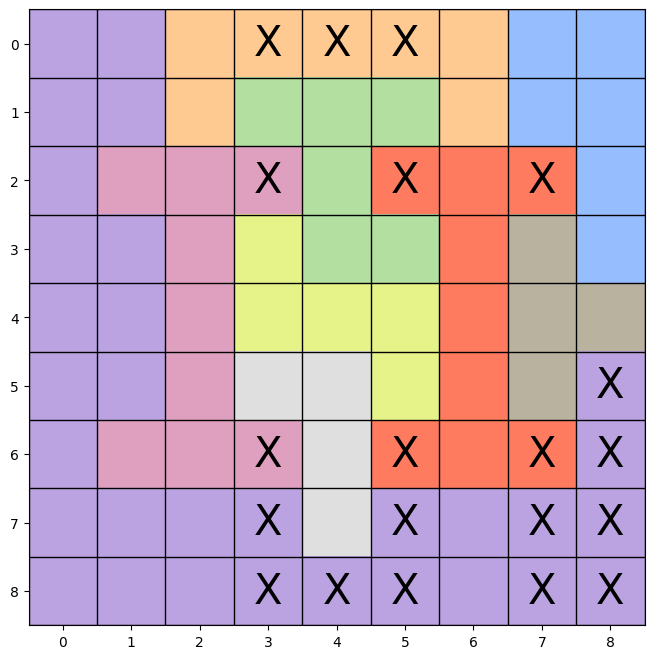

In [47]:
image_path = "/Users/HP/Desktop/Python/queen_solver/326.png"
color_matrix = main(image_path)
plot_color_matrix(color_matrix)

indexed_matrix, color_dict = convert_color_matrix(color_matrix)
indexed_matrix = np.array([[[idx, 0] for idx in row] for row in indexed_matrix])
solver_dict = create_solver_dict(indexed_matrix)
to_assign_empty = check_if_color_corr(solver_dict, indexed_matrix.shape[0])
for cell in to_assign_empty:
    indexed_matrix = assign_empty(indexed_matrix, cell)
plot_indexed_matrix(indexed_matrix, color_dict)

In [20]:
print(color_dict[1])
print(color_dict[5])
print(color_dict[indexed_matrix[2,1,0]])

(179, 223, 160)
(223, 223, 223)
(255, 201, 146)


In [21]:
def solver(indexed_matrix, color_dict):
    grid_size = indexed_matrix.shape[0]
    solver_dict = create_solver_dict(indexed_matrix)
    to_assign = []
    to_assign_empty = []
    while True:
        cells_to_assign = [x for elem in solver_dict.values() for x in elem]
        print(cells_to_assign)
        tmp0 = []
        tmp1 = []
        to_assign.extend(check_if_color_single_cell(solver_dict))
        
        tmp0.extend(check_if_row_single_cell(solver_dict))
        tmp0.extend(check_if_column_single_cell(solver_dict))
        
        to_assign.extend(x for x in tmp0 if x not in to_assign)

        to_assign_empty.extend(check_if_color_single_rc(solver_dict, grid_size))

        tmp1.extend(check_if_rc_single_color(solver_dict, grid_size))
        tmp1.extend(check_if_color_corr(solver_dict, grid_size))

        to_assign_empty.extend(x for x in tmp1 if x not in to_assign_empty)
        to_assign_empty = [x for x in to_assign_empty if x in cells_to_assign]

        if len(to_assign) == 0 and len(to_assign_empty) == 0:
            break
        
        for cell in to_assign:
            indexed_matrix = assign_queen(indexed_matrix, cell)
            plot_indexed_matrix(indexed_matrix, color_dict)

        for cell in to_assign_empty:
            indexed_matrix = assign_empty(indexed_matrix, cell)

        plot_indexed_matrix(indexed_matrix, color_dict)

        to_assign = []
        to_assign_empty = []
        
        solver_dict = create_solver_dict(indexed_matrix)
        
    return indexed_matrix

62 62
563 562


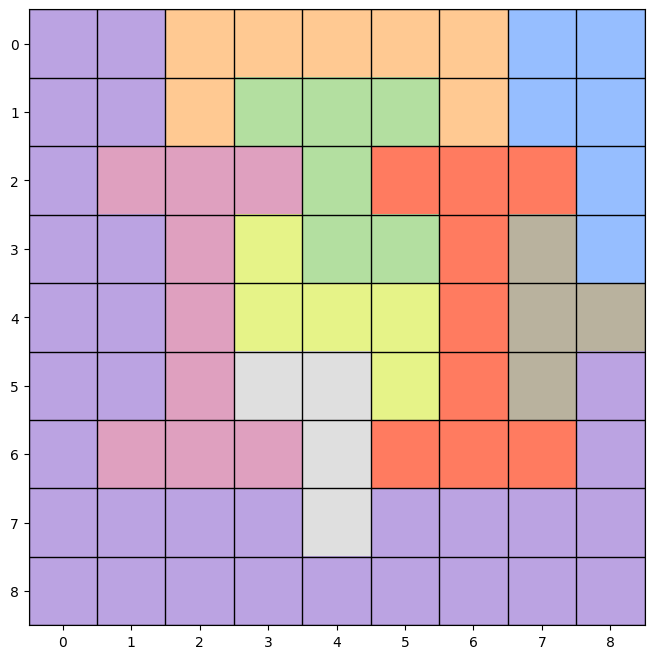

[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1), (5, 8), (6, 0), (6, 8), (7, 0), (7, 1), (7, 2), (7, 3), (7, 5), (7, 6), (7, 7), (7, 8), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 6), (0, 7), (0, 8), (1, 7), (1, 8), (2, 8), (3, 8), (1, 3), (1, 4), (1, 5), (2, 4), (3, 4), (3, 5), (2, 1), (2, 2), (2, 3), (3, 2), (4, 2), (5, 2), (6, 1), (6, 2), (6, 3), (2, 5), (2, 6), (2, 7), (3, 6), (4, 6), (5, 6), (6, 5), (6, 6), (6, 7), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (3, 7), (4, 7), (4, 8), (5, 7), (5, 3), (5, 4), (6, 4), (7, 4)]
{(0, 1, 2, 3): [0], (1, 2, 3): [1], (3, 4, 5): [2, 6], (0, 1, 2, 3, 4, 5, 6, 7, 8): [3], (2, 3, 4, 5, 6): [4, 7], (5, 6, 7): [5], (0, 1): [8]}


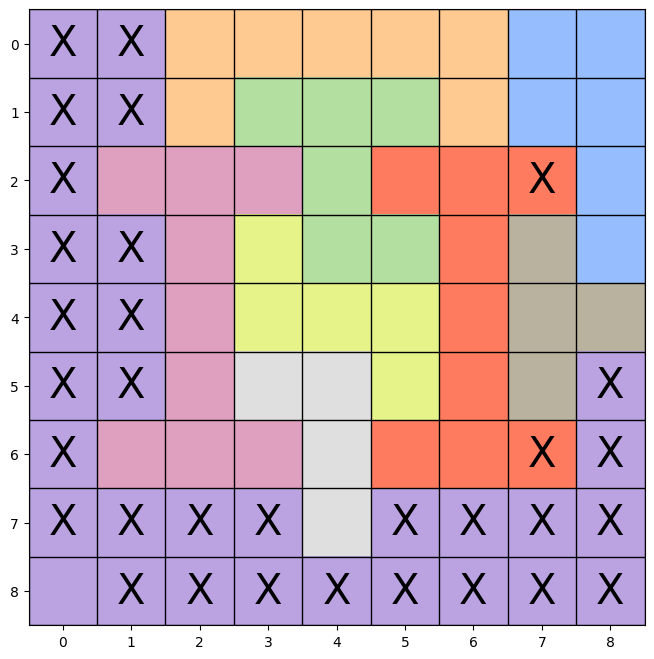

[(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 6), (0, 7), (0, 8), (1, 7), (1, 8), (2, 8), (3, 8), (1, 3), (1, 4), (1, 5), (2, 4), (3, 4), (3, 5), (2, 1), (2, 2), (2, 3), (3, 2), (4, 2), (5, 2), (6, 1), (6, 2), (6, 3), (2, 5), (2, 6), (3, 6), (4, 6), (5, 6), (6, 5), (6, 6), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (3, 7), (4, 7), (4, 8), (5, 7), (5, 3), (5, 4), (6, 4), (7, 4), (8, 0)]
{(0, 1, 2, 3): [0], (1, 2, 3): [1], (3, 4, 5): [2, 6], (8,): [3], (2, 3, 4, 5, 6): [4, 7], (5, 6, 7): [5], (0, 1): [8]}


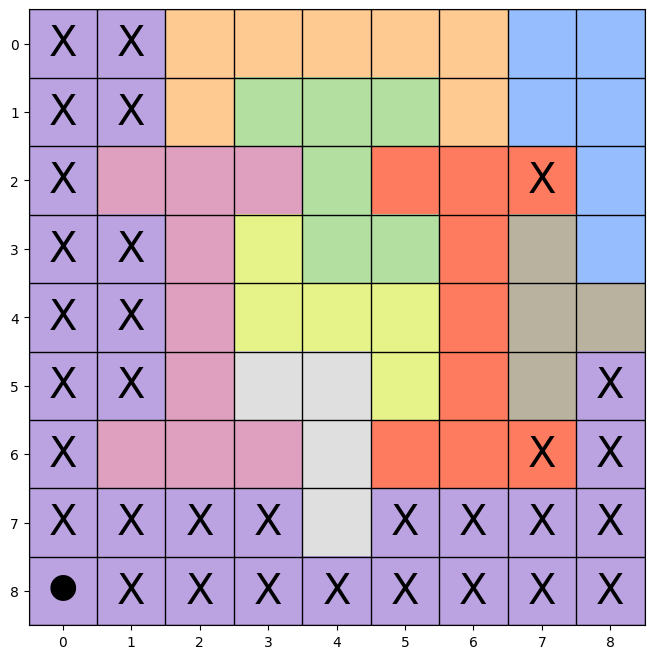

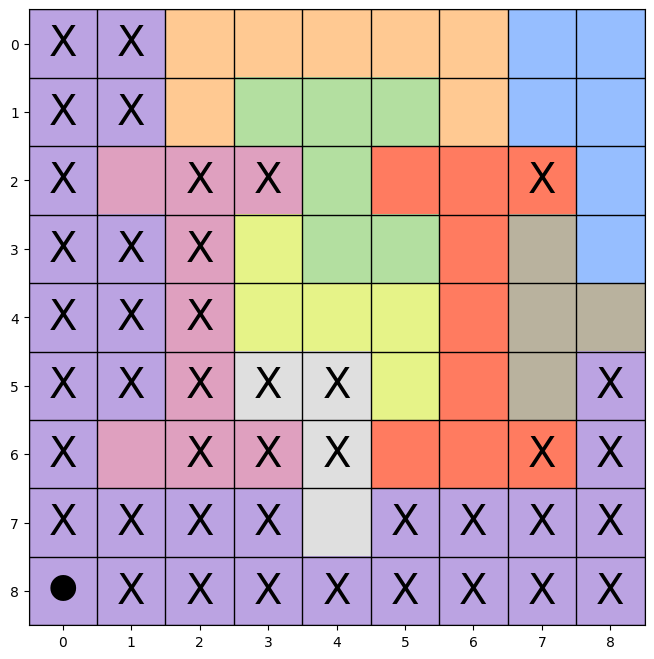

[(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 6), (0, 7), (0, 8), (1, 7), (1, 8), (2, 8), (3, 8), (1, 3), (1, 4), (1, 5), (2, 4), (3, 4), (3, 5), (2, 1), (6, 1), (2, 5), (2, 6), (3, 6), (4, 6), (5, 6), (6, 5), (6, 6), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (3, 7), (4, 7), (4, 8), (5, 7), (7, 4)]
{(0, 1, 2, 3): [0], (1, 2, 3): [1], (3, 4, 5): [2, 6], (): [3], (2, 6): [4], (7,): [5], (2, 3, 4, 5, 6): [7], (0, 1): [8]}


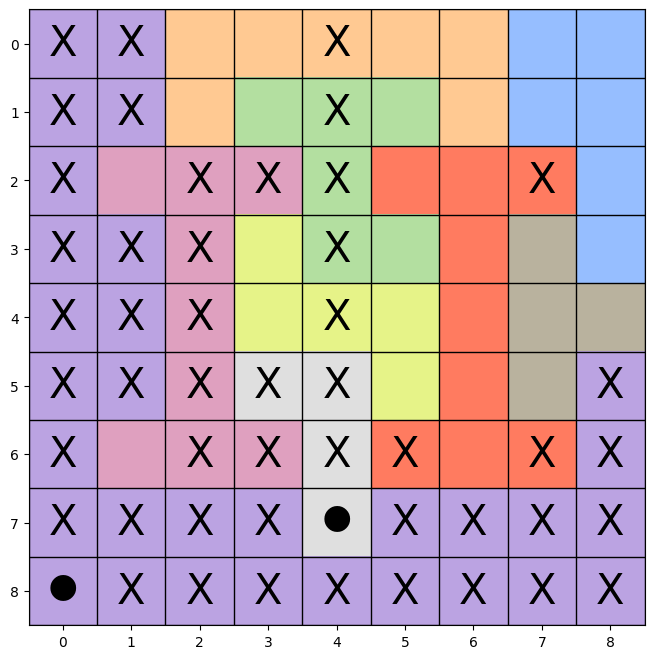

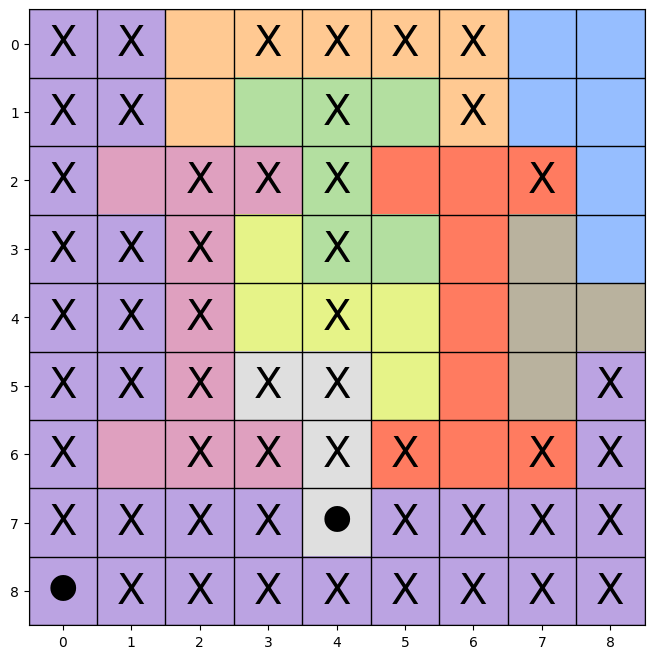

[(0, 2), (1, 2), (0, 7), (0, 8), (1, 7), (1, 8), (2, 8), (3, 8), (1, 3), (1, 5), (3, 5), (2, 1), (6, 1), (2, 5), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (3, 3), (4, 3), (4, 5), (5, 5), (3, 7), (4, 7), (4, 8), (5, 7)]
{(0, 1, 2, 3): [0], (1, 3): [1], (3, 4, 5): [2, 6], (): [3, 5], (2, 6): [4], (2, 3, 4, 5, 6): [7], (0, 1): [8]}


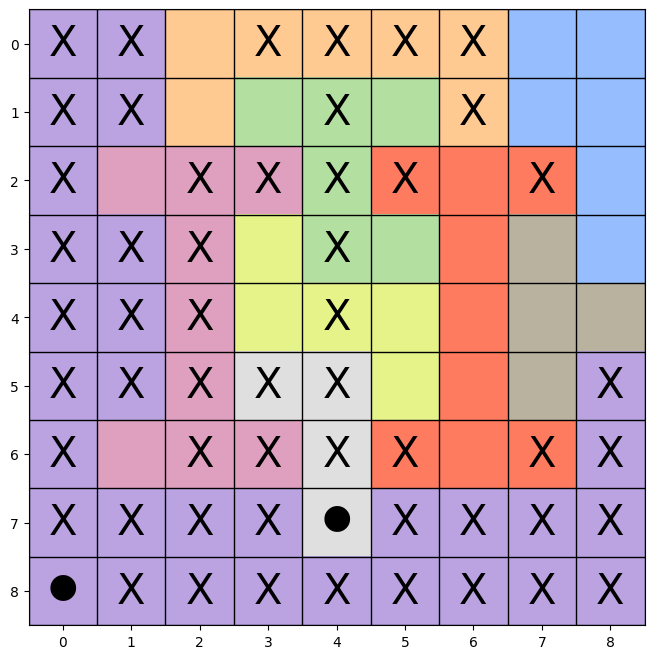

[(0, 2), (1, 2), (0, 7), (0, 8), (1, 7), (1, 8), (2, 8), (3, 8), (1, 3), (1, 5), (3, 5), (2, 1), (6, 1), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (3, 3), (4, 3), (4, 5), (5, 5), (3, 7), (4, 7), (4, 8), (5, 7)]
{(0, 1, 2, 3): [0], (1, 3): [1], (3, 4, 5): [2, 6], (): [3, 5], (2, 6): [4], (2, 3, 4, 5, 6): [7], (0, 1): [8]}


In [22]:
# Esegui il codice
image_path = "/Users/HP/Desktop/Python/queen_solver/326.png"
color_matrix = main(image_path)
plot_color_matrix(color_matrix)

indexed_matrix, color_dict = convert_color_matrix(color_matrix)
indexed_matrix = np.array([[[idx, 0] for idx in row] for row in indexed_matrix])
a = solver(indexed_matrix, color_dict)

In [23]:
def check_unvalid_cells(indexed_matrix, solver_dict):
    ''' Check if there are cells that are not assigned and that can't be assigned to a queen
    '''
    to_assign_empty = []
    grid_size = indexed_matrix.shape[0]
    initial_keys = solver_dict.keys()
    for key, elem in solver_dict.items():
        if len(elem) > 1:
            for cell in elem:
                test_matrix = indexed_matrix.copy()
                test_matrix = assign_queen(test_matrix, cell)
                test_solver_dict = create_solver_dict(test_matrix)
                if len(initial_keys) != len(test_solver_dict.keys())+1:
                    to_assign_empty.append(cell)
    return to_assign_empty

62 62
563 562


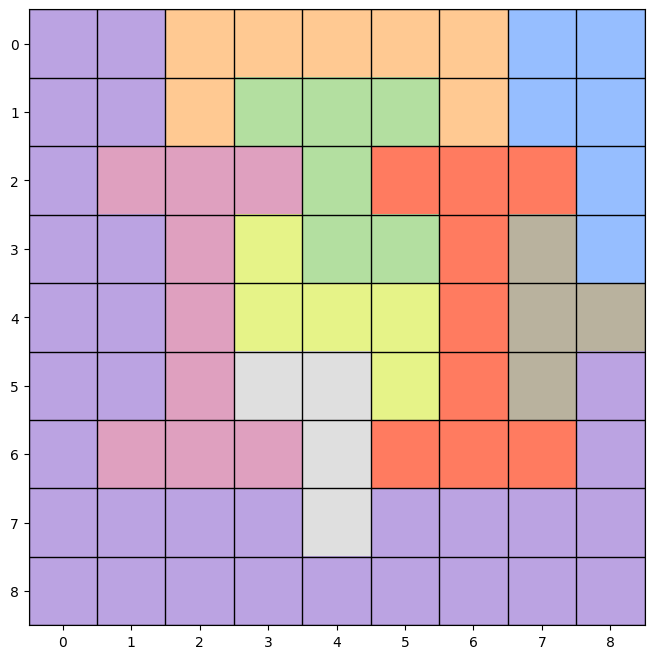

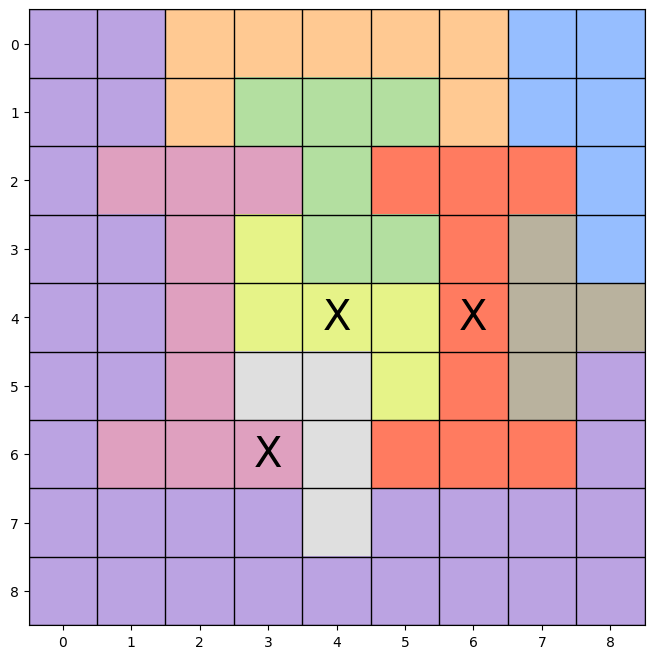

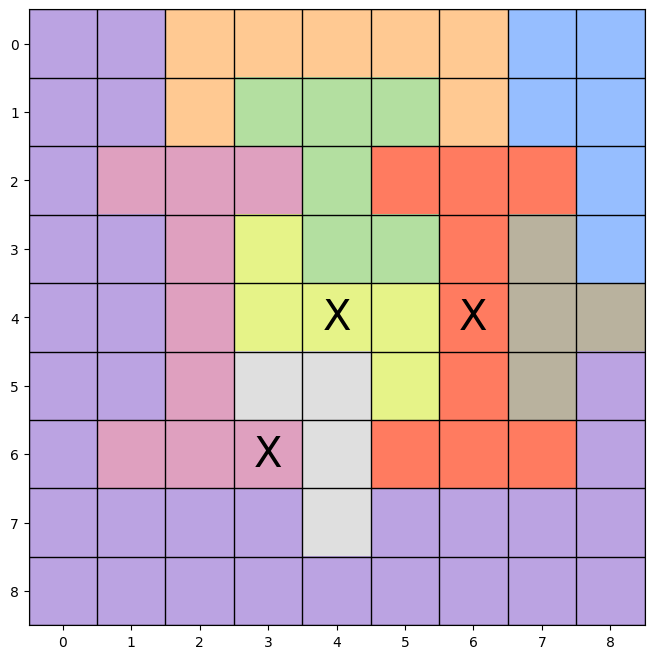

In [24]:
image_path = "/Users/HP/Desktop/Python/queen_solver/326.png"
color_matrix = main(image_path)
plot_color_matrix(color_matrix)

indexed_matrix, color_dict = convert_color_matrix(color_matrix)
indexed_matrix = np.array([[[idx, 0] for idx in row] for row in indexed_matrix])
solver_dict = create_solver_dict(indexed_matrix)
while True:
    to_assign_empty = check_unvalid_cells(indexed_matrix, solver_dict)
    if len(to_assign_empty) == 0:
        break
    for cell in to_assign_empty:
        indexed_matrix = assign_empty(indexed_matrix, cell)
    to_assign_empty = []
    plot_indexed_matrix(indexed_matrix, color_dict)
    solver_dict = create_solver_dict(indexed_matrix)
plot_indexed_matrix(indexed_matrix, color_dict)

In [25]:
def solver(indexed_matrix, color_dict):
    grid_size = indexed_matrix.shape[0]
    solver_dict = create_solver_dict(indexed_matrix)
    to_assign = []
    to_assign_empty = []
    while True:
        cells_to_assign = [x for elem in solver_dict.values() for x in elem]
        tmp0 = []
        tmp1 = []
        to_assign.extend(check_if_color_single_cell(solver_dict))
        
        tmp0.extend(check_if_row_single_cell(solver_dict))
        tmp0.extend(check_if_column_single_cell(solver_dict))
        
        to_assign.extend(x for x in tmp0 if x not in to_assign)

        to_assign_empty.extend(check_if_color_single_rc(solver_dict, grid_size))

        tmp1.extend(check_if_rc_single_color(solver_dict, grid_size))
        tmp1.extend(check_if_color_corr(solver_dict, grid_size))
        tmp1.extend(check_unvalid_cells(indexed_matrix, solver_dict))

        to_assign_empty.extend(x for x in tmp1 if x not in to_assign_empty)
        to_assign_empty = [x for x in to_assign_empty if x in cells_to_assign]



        if len(to_assign) == 0 and len(to_assign_empty) == 0:
            break
        
        for cell in to_assign:
            indexed_matrix = assign_queen(indexed_matrix, cell)
            plot_indexed_matrix(indexed_matrix, color_dict)

        for cell in to_assign_empty:
            indexed_matrix = assign_empty(indexed_matrix, cell)

        plot_indexed_matrix(indexed_matrix, color_dict)

        to_assign = []
        to_assign_empty = []
        
        solver_dict = create_solver_dict(indexed_matrix)
        
    return indexed_matrix

62 62
563 562


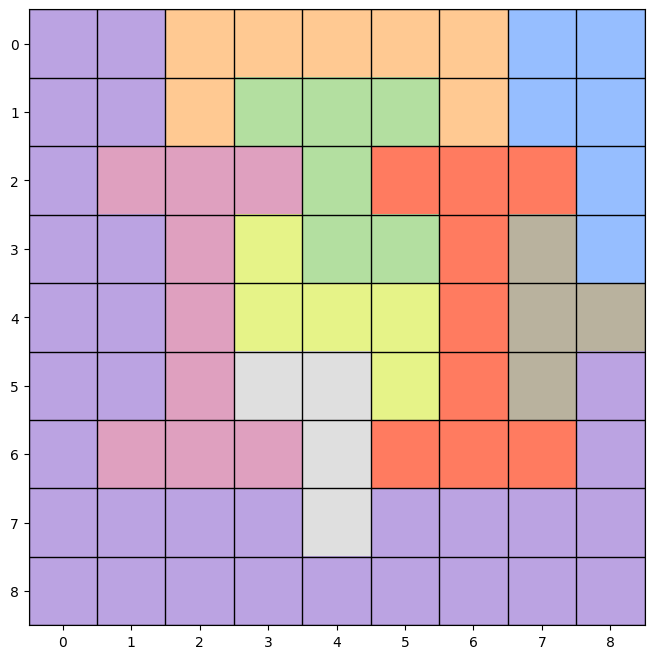

{(0, 1, 2, 3): [0], (1, 2, 3): [1], (3, 4, 5): [2, 6], (0, 1, 2, 3, 4, 5, 6, 7, 8): [3], (2, 3, 4, 5, 6): [4, 7], (5, 6, 7): [5], (0, 1): [8]}


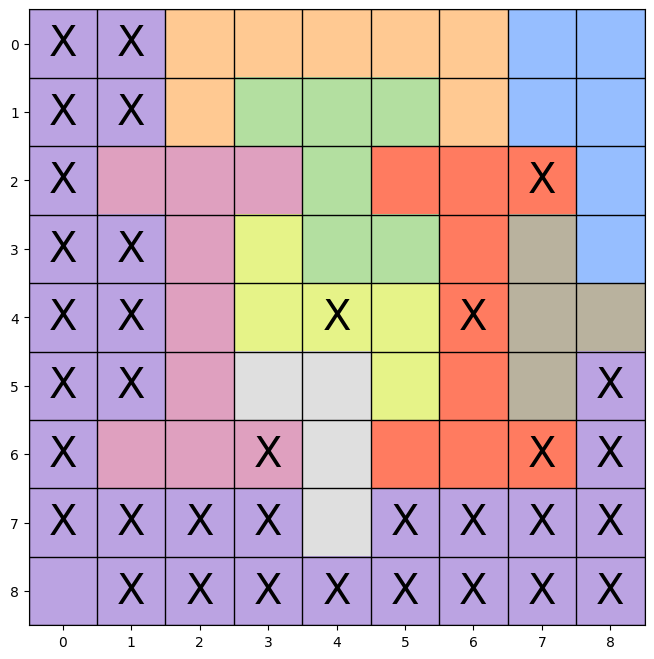

{(0, 1, 2, 3): [0], (1, 2, 3): [1], (3, 4, 5): [2, 6], (8,): [3], (2, 3, 4, 5, 6): [4], (5, 6, 7): [5], (2, 3, 5, 6): [7], (0, 1): [8]}


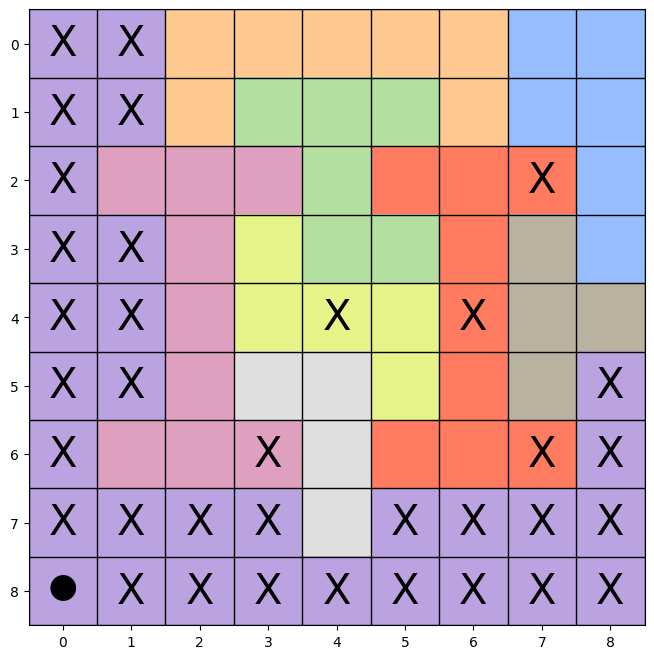

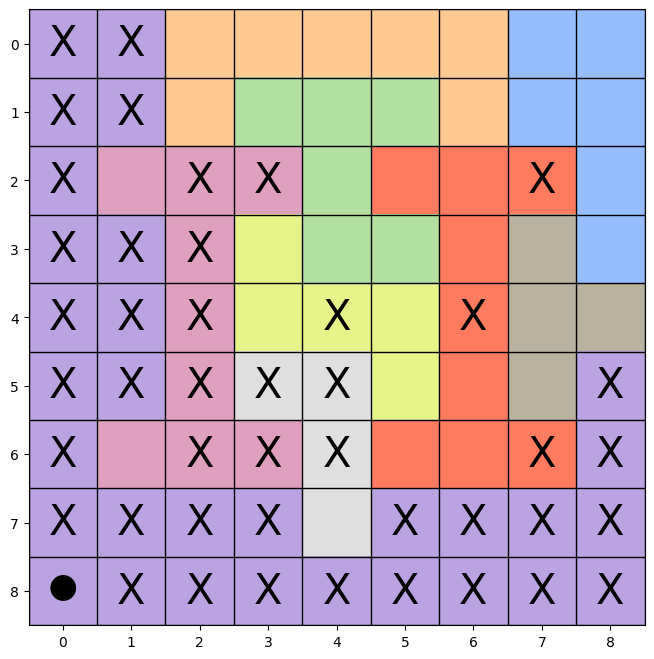

{(0, 1, 2, 3): [0], (1, 2, 3): [1], (3, 4, 5): [2, 6], (): [3], (2, 6): [4], (7,): [5], (2, 3, 5, 6): [7], (0, 1): [8]}


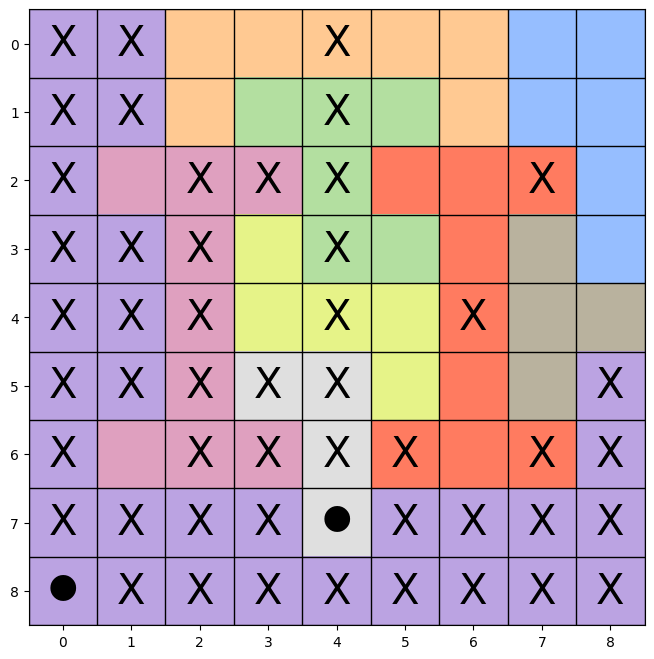

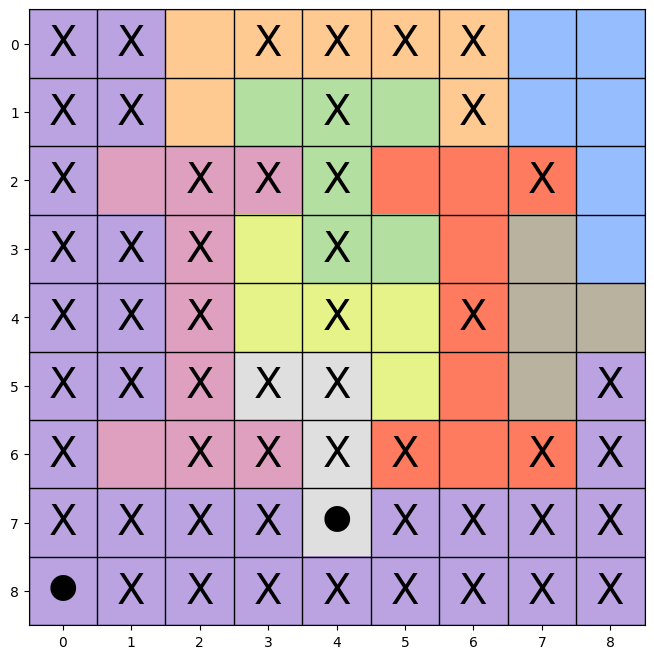

{(0, 1, 2, 3): [0], (1, 3): [1], (3, 4, 5): [2, 6], (): [3, 5], (2, 6): [4], (2, 3, 5, 6): [7], (0, 1): [8]}


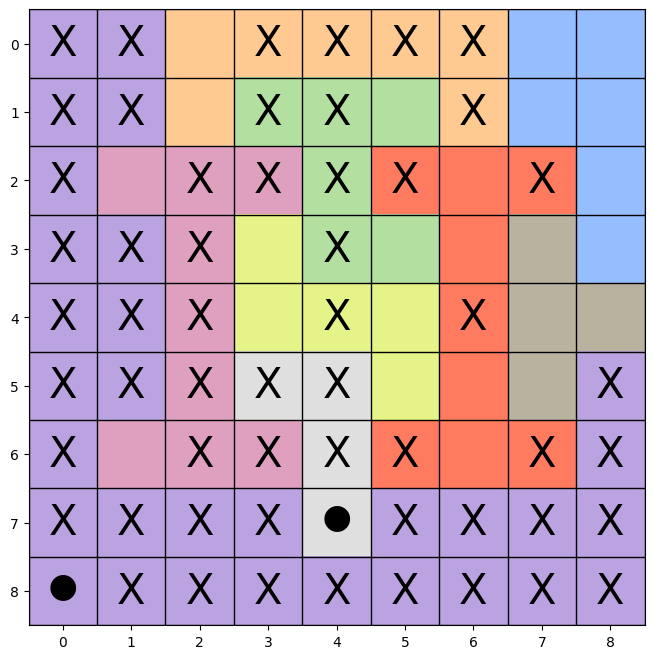

{(0, 1, 2, 3): [0], (1, 3): [1], (3, 4, 5): [2, 6], (): [3, 5], (2, 6): [4], (2, 3, 5, 6): [7], (0, 1): [8]}


KeyboardInterrupt: 

In [26]:
# Esegui il codice
image_path = "/Users/HP/Desktop/Python/queen_solver/326.png"
color_matrix = main(image_path)
plot_color_matrix(color_matrix)

indexed_matrix, color_dict = convert_color_matrix(color_matrix)
indexed_matrix = np.array([[[idx, 0] for idx in row] for row in indexed_matrix])
a = solver(indexed_matrix, color_dict)

In [ ]:
def apply_function(f, indexed_matrix, queen=True):
    solver_dict = create_solver_dict(indexed_matrix)
    if queen:
        to_assign = f(solver_dict)
        if len(to_assign) == 0:
            return False, indexed_matrix
        for cell in to_assign:
            indexed_matrix = assign_queen(indexed_matrix, cell)
    else:
        if f == check_unvalid_cells:
            to_assign_empty = f(indexed_matrix, solver_dict)
        else:
            to_assign_empty = f(solver_dict, indexed_matrix.shape[0])
        if len(to_assign_empty) == 0:
            return False, indexed_matrix
        for cell in to_assign_empty:
            indexed_matrix = assign_empty(indexed_matrix, cell)
    
    return True, indexed_matrix


In [ ]:
def solver_recursive(indexed_matrix, color_dict):
    grid_size = indexed_matrix.shape[0]
    functions_queen = [check_if_color_single_cell, check_if_row_single_cell, check_if_column_single_cell]
    functions_empty = [check_if_color_single_rc, check_if_rc_single_color, check_if_color_corr]
    while True:
        
        check_advance = False
        for f in functions_queen:

            res, indexed_matrix = apply_function(f, indexed_matrix)
            if res:
                check_advance = True
                plot_indexed_matrix(indexed_matrix, color_dict)
                

        for f in functions_empty:

            res, indexed_matrix = apply_function(f, indexed_matrix, queen=False)
            if res:
                check_advance = True
                plot_indexed_matrix(indexed_matrix, color_dict)
        
        print(check_advance)
                
                
        if check_advance == False:
            break

    return indexed_matrix

62 62
563 562


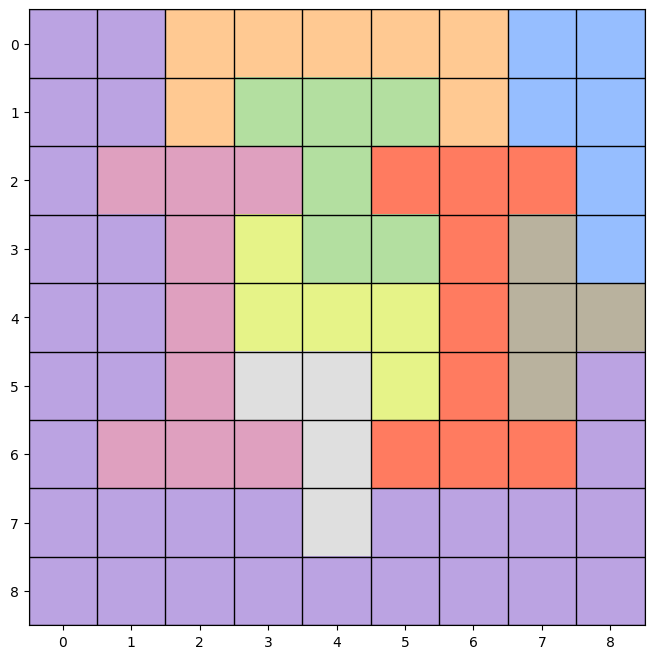

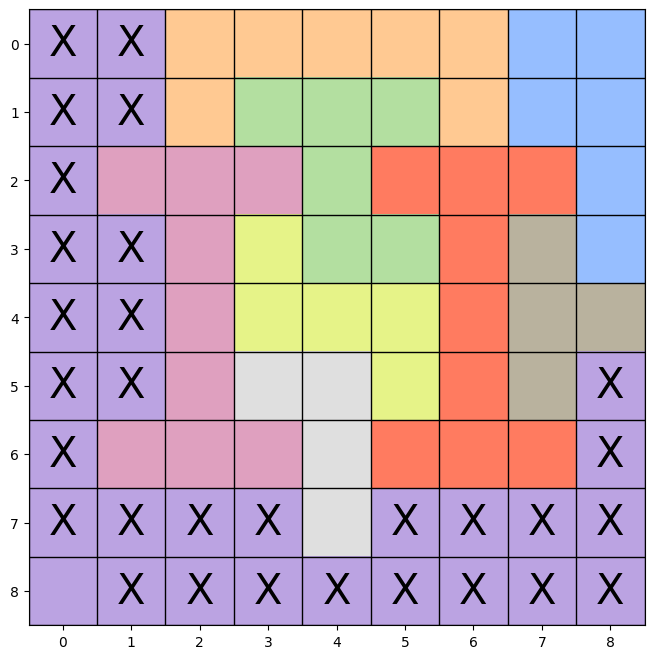

{(0, 1, 2, 3): [0], (1, 2, 3): [1], (3, 4, 5): [2, 6], (8,): [3], (2, 3, 4, 5, 6): [4, 7], (5, 6, 7): [5], (0, 1): [8]}


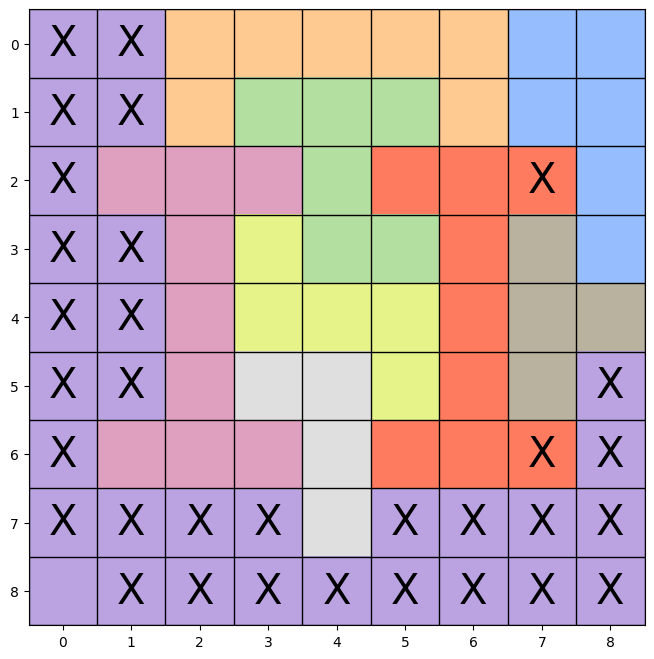

True


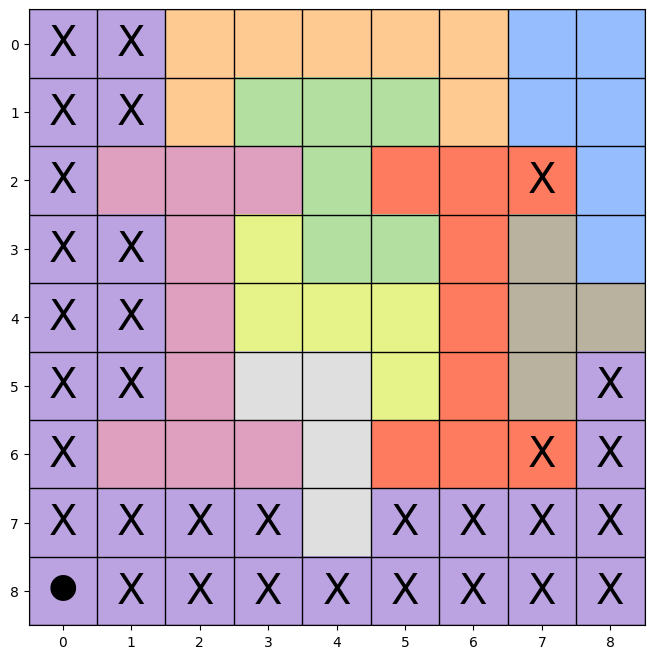

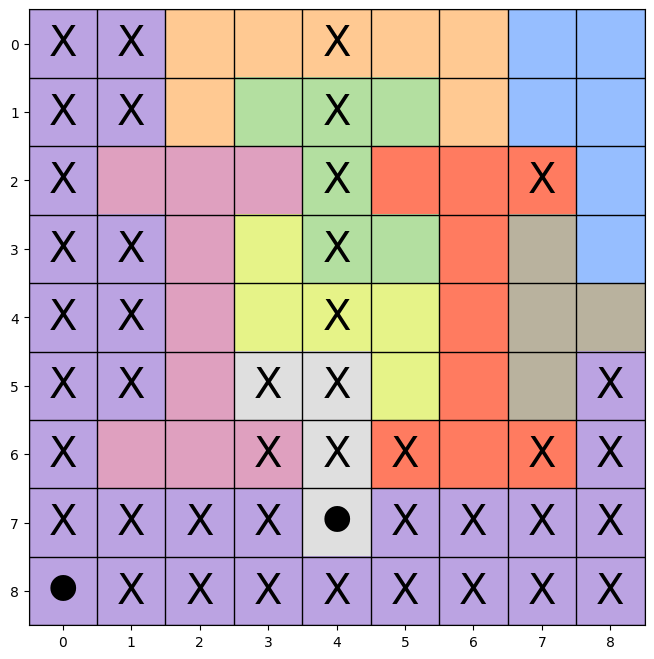

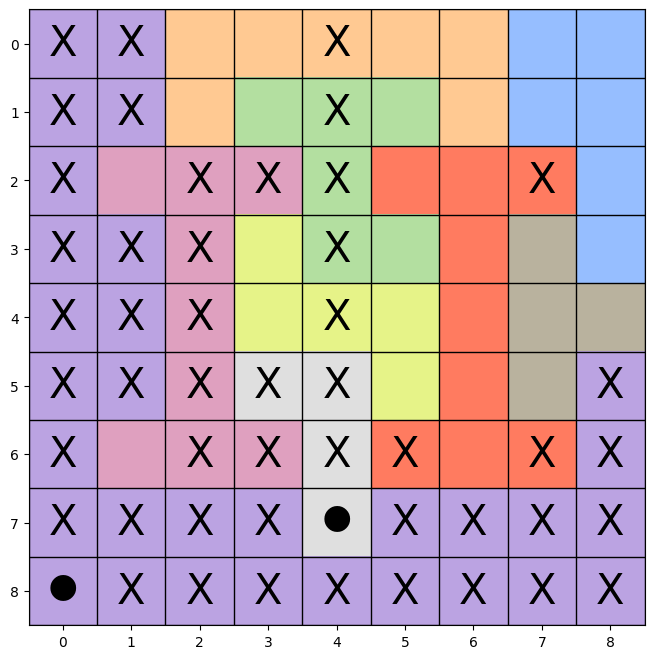

{(0, 1, 2, 3): [0], (1, 3): [1], (3, 4, 5): [2, 6], (): [3, 5], (2, 6): [4], (2, 3, 4, 5, 6): [7], (0, 1): [8]}


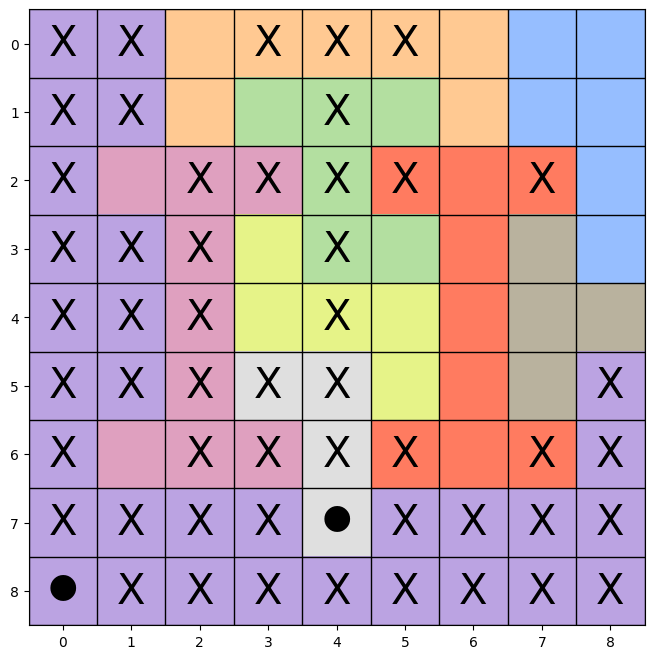

True


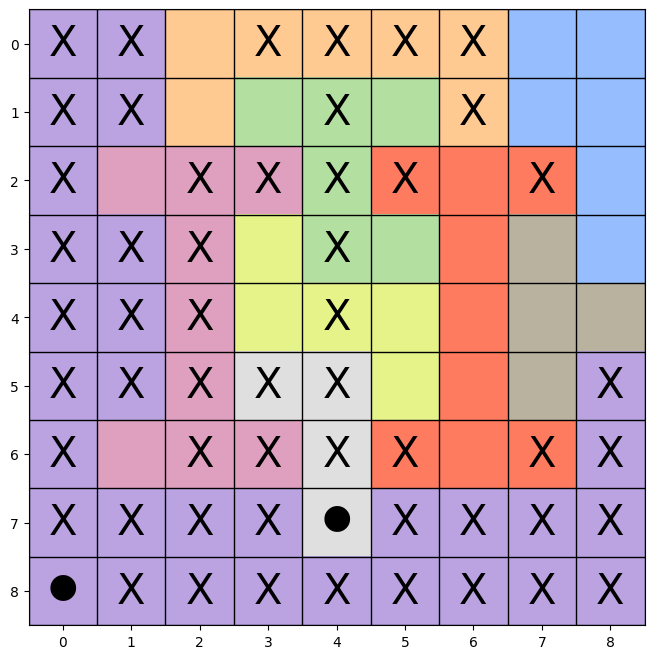

{(0, 1, 2, 3): [0], (1, 3): [1], (3, 4, 5): [2, 6], (): [3, 5], (2, 6): [4], (2, 3, 4, 5, 6): [7], (0, 1): [8]}


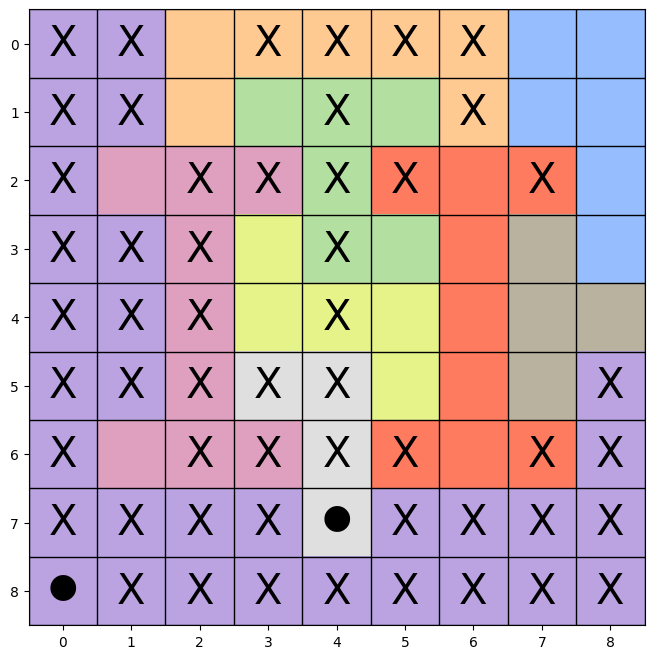

True


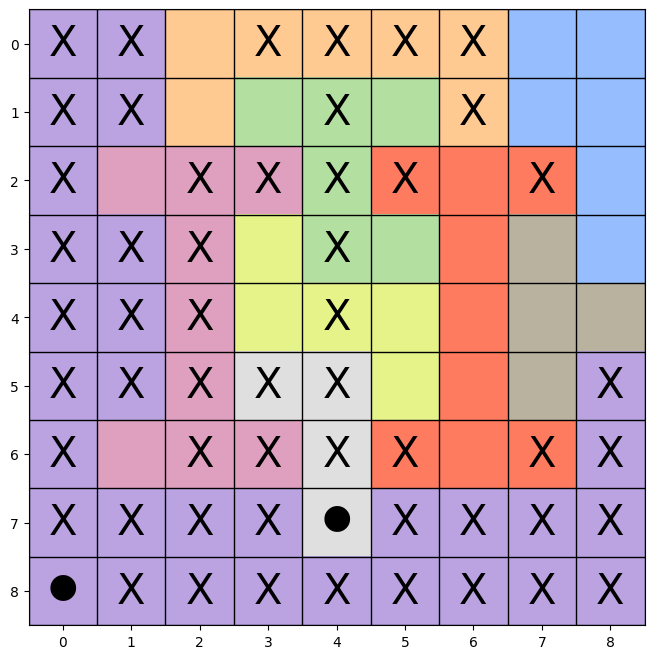

{(0, 1, 2, 3): [0], (1, 3): [1], (3, 4, 5): [2, 6], (): [3, 5], (2, 6): [4], (2, 3, 4, 5, 6): [7], (0, 1): [8]}


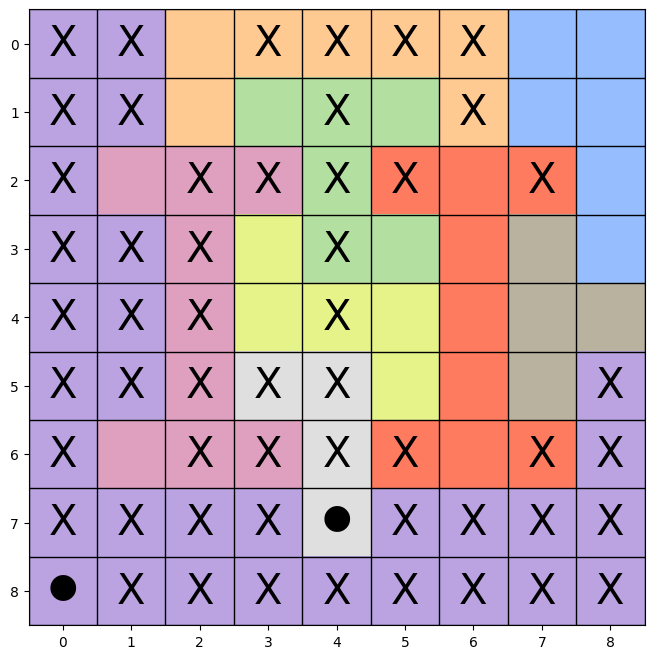

True


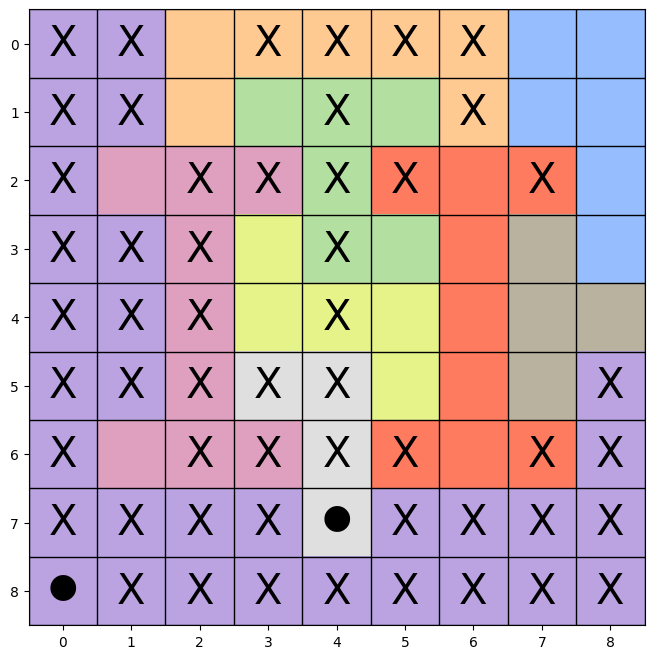

{(0, 1, 2, 3): [0], (1, 3): [1], (3, 4, 5): [2, 6], (): [3, 5], (2, 6): [4], (2, 3, 4, 5, 6): [7], (0, 1): [8]}


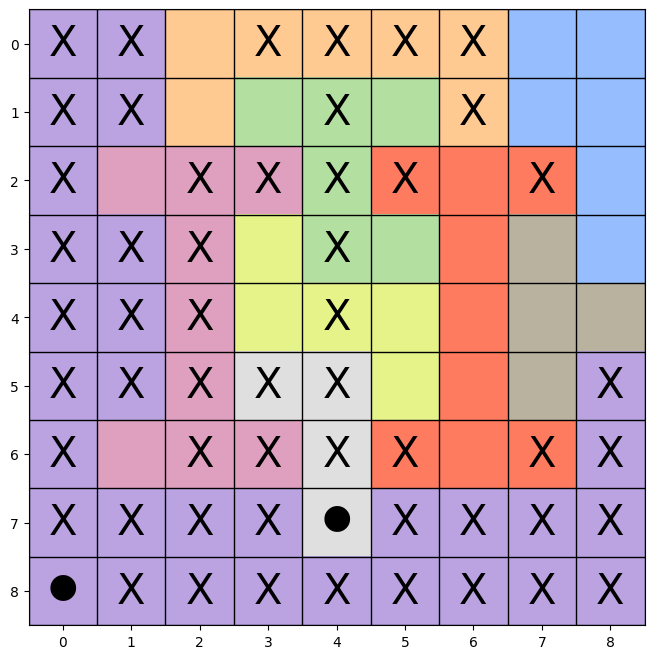

True


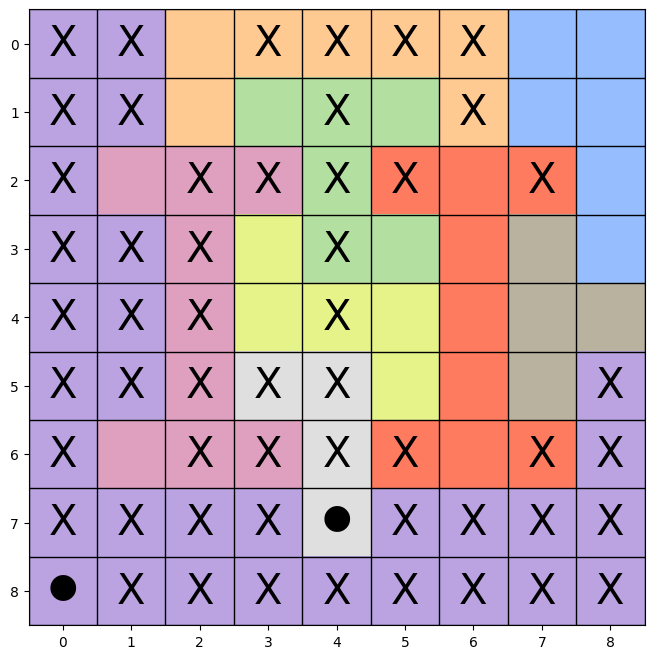

{(0, 1, 2, 3): [0], (1, 3): [1], (3, 4, 5): [2, 6], (): [3, 5], (2, 6): [4], (2, 3, 4, 5, 6): [7], (0, 1): [8]}


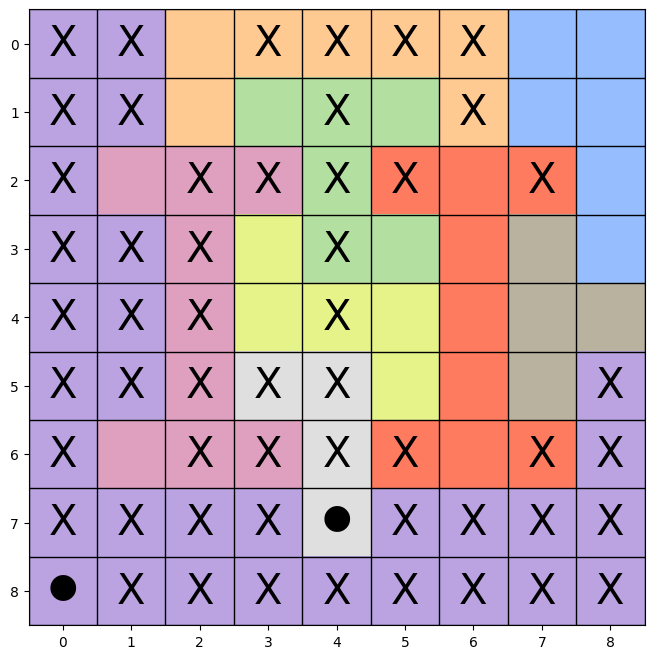

True


KeyboardInterrupt: 

In [ ]:
# Esegui il codice
image_path = "/Users/HP/Desktop/Python/queen_solver/326.png"
color_matrix = main(image_path)
plot_color_matrix(color_matrix)

indexed_matrix, color_dict = convert_color_matrix(color_matrix)
indexed_matrix = np.array([[[idx, 0] for idx in row] for row in indexed_matrix])
a = solver_recursive(indexed_matrix, color_dict)